## Structural Time Series Models

**Structural Time Series Models (STSMs)** are a class of statistical models used to analyze and forecast time series data. They decompose the observed data into components such as trend, seasonality, and noise. These models allow for a flexible specification of the underlying processes and can account for various sources of variability in the data. Common components in STSMs include:

- **Level**: The baseline or average value of the series.
- **Trend**: The long-term movement or direction in the data.
- **Seasonality**: The repeating patterns or cycles that occur at regular intervals.
- **Irregular or Residuals**: The noise or random fluctuations that are not explained by the model.

### First Use of Structural Time Series Models (STSM) in Agriculture
The first notable use of **Structural Time Series Models (STSMs)** in agriculture occurred in the **1970s** in the **United States**. Researchers and agricultural economists applied STSMs to model and forecast key agricultural parameters like crop yield, commodity prices, and production volumes. The focus was on understanding the impact of **seasonality**, **long-term trends**, and external shocks like **weather patterns** on agricultural production.

- **Year**: 1970s  
- **Country**: United States  

STSMs provided a robust framework to incorporate various forms of time-varying patterns and structural components in the data, making them particularly useful for analyzing agricultural trends over time.
### Key Agricultural Applications of Structural Time Series Models

- **Crop Yield Forecasting**:
  - Predict future crop yields based on historical data, weather patterns, and other relevant factors.
  - Help in planning for food security and managing supply chains.

- **Commodity Price Prediction**:
  - Forecast agricultural commodity prices like wheat, corn, and rice by understanding seasonal and trend patterns.
  - Inform agricultural policy and trading decisions.

- **Livestock Management**:
  - Predict livestock growth, reproduction cycles, and disease outbreaks based on seasonal patterns and long-term trends.

- **Irrigation Management**:
  - Analyze water usage and predict future irrigation needs based on seasonal patterns and environmental trends.
  - Optimize resource allocation during dry and wet seasons.

- **Pesticide and Fertilizer Usage**:
  - Forecast demand for agricultural inputs like pesticides and fertilizers based on seasonal trends and crop needs.

- **Climate and Weather Impact Analysis**:
  - Model the effects of climate variability on agricultural productivity, helping to prepare for extreme weather events such as droughts or floods.
  
- **Agricultural Supply Chain Optimization**:
  - Use STSMs to predict fluctuations in production and demand, ensuring a more efficient agricultural supply chain and reducing waste.

- **Farm Revenue Prediction**:
  - Estimate farm revenues based on crop production forecasts, commodity prices, and other economic factors.

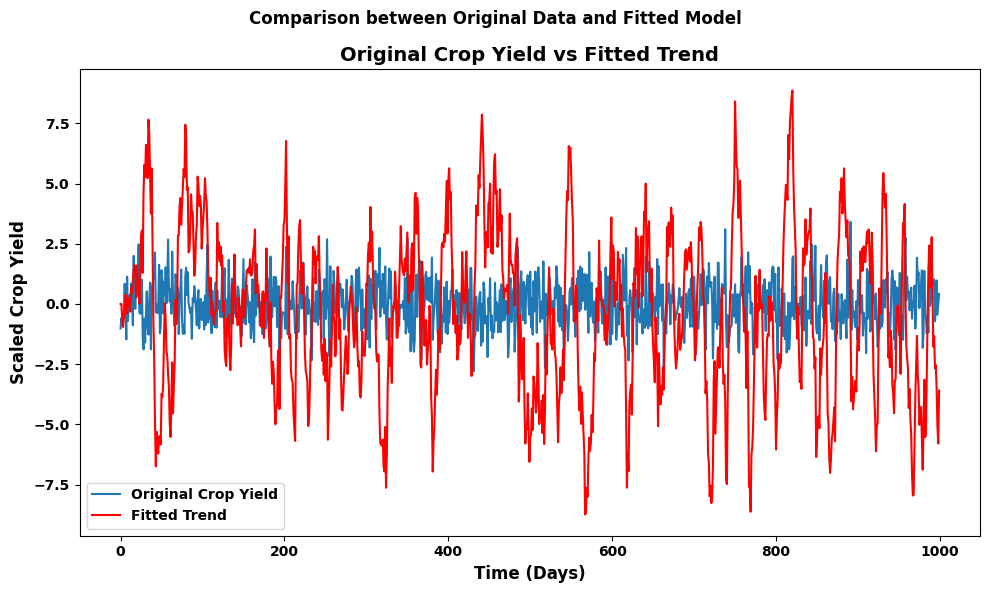

Error in model fitting: float() argument must be a string or a real number, not 'builtin_function_or_method'


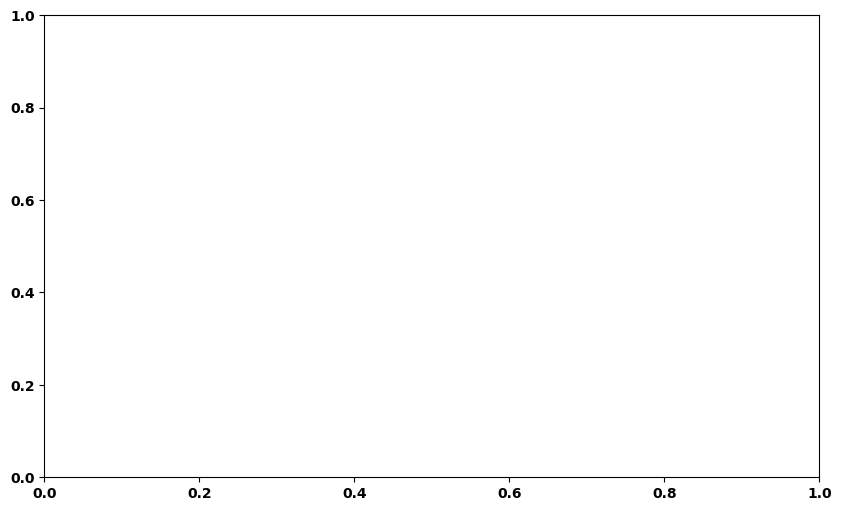

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')

# Global plot settings
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Agricultural Data
def generate_agriculture_data():
    n = 1000  # Number of data points (e.g., time steps for crop yield analysis)
    t = np.arange(n)  # Time steps

    # Generate correlated environmental factors
    irrigation = np.random.normal(50, 10, n)  # Irrigation levels (in mm)
    temperature = np.random.normal(25, 5, n)  # Temperature (in Celsius)
    rainfall = np.random.normal(100, 20, n)   # Rainfall (in mm)
    soil_quality = np.random.normal(0.8, 0.1, n)  # Soil quality index (0 to 1)
    humidity = np.random.normal(60, 10, n)     # Humidity (%)
    fertilizer = np.random.normal(30, 5, n)    # Fertilizer usage (kg/hectare)
    
    # Simulate crop_yield as a function of these factors (with some noise)
    crop_yield = (0.5 * irrigation + 0.3 * temperature + 0.1 * rainfall +
                  0.2 * soil_quality + 0.1 * humidity + 0.05 * fertilizer +
                  np.random.normal(0, 50, n))  # Adding noise to crop yield
    
    data = {
        'irrigation': irrigation,
        'temperature': temperature,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'humidity': humidity,
        'fertilizer': fertilizer,
        'crop_yield': crop_yield
    }

    return pd.DataFrame(data)

# Step 2: Standardize Data (Ensure no NaNs or Infinities)
def standardize_data(df):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_data

# Step 3: Apply Unobserved Components Model
def apply_model(data):
    # Ensure the 'crop_yield' column is passed correctly as a pandas Series (not a method or function)
    if isinstance(data['crop_yield'], pd.Series):
        model = UnobservedComponents(data['crop_yield'], level=True, trend=True, seasonal=12)
        results = model.fit()
        return results
    else:
        raise ValueError("Expected 'crop_yield' to be a pandas Series")

# Step 4: Simplified Visualization with 5 Key Visualizations
def plot_agriculture_results(scaled_data, fitted_values, trend_values, seasonal_values, residual_values):
    # Fitted Values vs Original Data
    plt.figure(figsize=(10, 6))
    plt.plot(scaled_data['crop_yield'], label='Original Crop Yield')
    plt.plot(fitted_values, label='Fitted Trend', color='red')
    plt.title('Original Crop Yield vs Fitted Trend', fontsize=14)
    plt.suptitle('Comparison between Original Data and Fitted Model', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Scaled Crop Yield', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Trend Component
    plt.figure(figsize=(10, 6))
    plt.plot(trend_values, label='Trend', color='green')
    plt.title('Trend Component', fontsize=14)
    plt.suptitle('Long-term Trend in Crop Yield', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Trend Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Seasonal Component
    plt.figure(figsize=(10, 6))
    plt.plot(seasonal_values, label='Seasonality', color='orange')
    plt.title('Seasonal Component', fontsize=14)
    plt.suptitle('Seasonal Variation in Crop Yield', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Seasonal Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residual_values, label='Residuals', color='purple')
    plt.title('Residuals from the Model', fontsize=14)
    plt.suptitle('Residuals Analysis for Model Fit', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Residual Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # ACF of Residuals
    plt.figure(figsize=(10, 6))
    plot_acf(residual_values, lags=50)
    plt.title('Autocorrelation of Residuals', fontsize=14)
    plt.suptitle('Autocorrelation of Residuals to Check Model Accuracy', fontsize=12, fontweight='bold')
    plt.xlabel('Lags', fontsize=12)
    plt.ylabel('Autocorrelation', fontsize=12)
    plt.tight_layout()
    plt.show()

# Step 5: Generate Dynamic Interpretation
def generate_agriculture_interpretation():
    print("\nDynamic Interpretation of Agricultural Results:")
    print("1. Trend: The overall long-term increase or decrease in crop yield over time.")
    print("2. Seasonality: The regular, repeating fluctuations in crop yield, often tied to seasonal patterns.")
    print("3. Residuals: The unexplained variations in crop yield after accounting for trend and seasonality.")
    print("4. ACF: The autocorrelation function shows whether residuals are independent (important for model accuracy).")
    print("5. Fertilizer, Irrigation, and Temperature: Factors that likely influence crop yield over time.")
    print("6. Model Fit: Checking residuals and ACF can indicate how well the model has captured the data.")

# Main Execution
def main():
    # Step 1: Generate synthetic data
    data = generate_agriculture_data()

    # Step 2: Standardize data
    scaled_data = standardize_data(data)

    # Step 3: Apply Unobserved Components Model to crop yield
    try:
        results = apply_model(scaled_data)
    
        # Step 4: Extract results
        fitted_values = results.fittedvalues
        trend_values = results.trend.values
        seasonal_values = results.seasonal.values
        residual_values = results.resid.values

        # Step 5: Plot Results
        plot_agriculture_results(scaled_data, fitted_values, trend_values, seasonal_values, residual_values)

        # Step 6: Generate interpretation
        generate_agriculture_interpretation()
    
    except Exception as e:
        print(f"Error in model fitting: {e}")

# Run the main function
main()


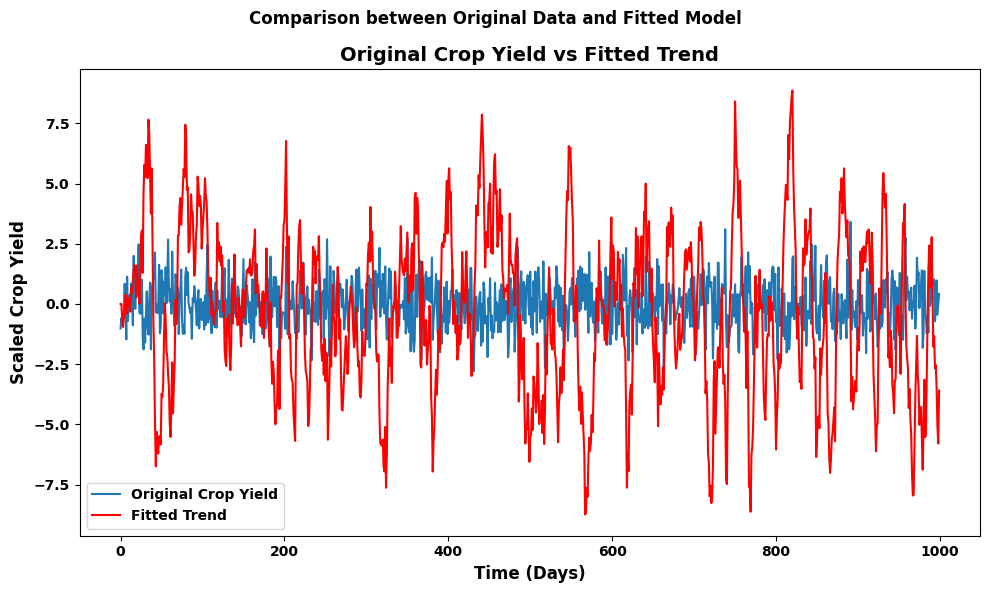

Error in model fitting: float() argument must be a string or a real number, not 'builtin_function_or_method'


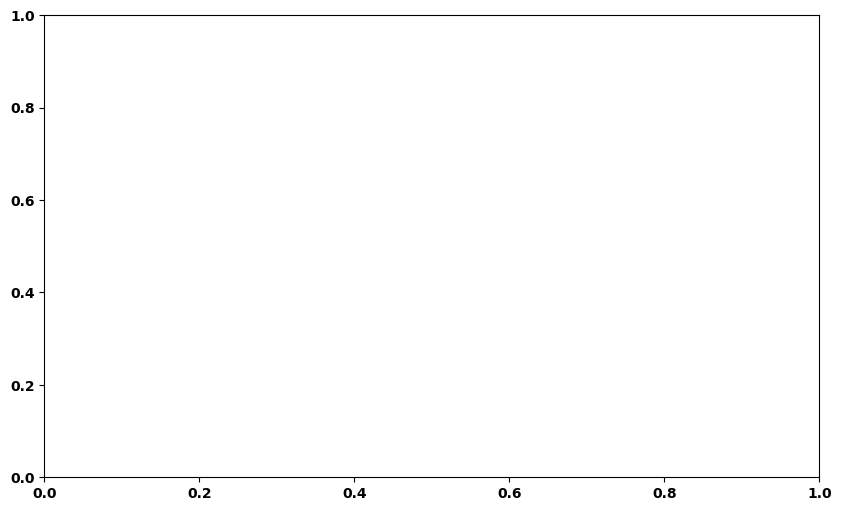

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')

# Global plot settings
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Agricultural Data
def generate_agriculture_data():
    n = 1000  # Number of data points (e.g., time steps for crop yield analysis)
    t = np.arange(n)  # Time steps

    # Generate correlated environmental factors
    irrigation = np.random.normal(50, 10, n)  # Irrigation levels (in mm)
    temperature = np.random.normal(25, 5, n)  # Temperature (in Celsius)
    rainfall = np.random.normal(100, 20, n)   # Rainfall (in mm)
    soil_quality = np.random.normal(0.8, 0.1, n)  # Soil quality index (0 to 1)
    humidity = np.random.normal(60, 10, n)     # Humidity (%)
    fertilizer = np.random.normal(30, 5, n)    # Fertilizer usage (kg/hectare)
    
    # Simulate crop_yield as a function of these factors (with some noise)
    crop_yield = (0.5 * irrigation + 0.3 * temperature + 0.1 * rainfall +
                  0.2 * soil_quality + 0.1 * humidity + 0.05 * fertilizer +
                  np.random.normal(0, 50, n))  # Adding noise to crop yield
    
    data = {
        'irrigation': irrigation,
        'temperature': temperature,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'humidity': humidity,
        'fertilizer': fertilizer,
        'crop_yield': crop_yield
    }

    return pd.DataFrame(data)

# Step 2: Standardize Data (Ensure no NaNs or Infinities)
def standardize_data(df):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_data

# Step 3: Apply Unobserved Components Model
def apply_model(data):
    # Ensure the 'crop_yield' column is passed correctly as a pandas Series (not a method or function)
    if isinstance(data['crop_yield'], pd.Series):
        model = UnobservedComponents(data['crop_yield'], level=True, trend=True, seasonal=12)
        results = model.fit()
        return results
    else:
        raise ValueError("Expected 'crop_yield' to be a pandas Series")

# Step 4: Simplified Visualization with 5 Key Visualizations
def plot_agriculture_results(scaled_data, fitted_values, trend_values, seasonal_values, residual_values):
    # Fitted Values vs Original Data
    plt.figure(figsize=(10, 6))
    plt.plot(scaled_data['crop_yield'], label='Original Crop Yield')
    plt.plot(fitted_values, label='Fitted Trend', color='red')
    plt.title('Original Crop Yield vs Fitted Trend', fontsize=14)
    plt.suptitle('Comparison between Original Data and Fitted Model', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Scaled Crop Yield', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Trend Component
    plt.figure(figsize=(10, 6))
    plt.plot(trend_values, label='Trend', color='green')
    plt.title('Trend Component', fontsize=14)
    plt.suptitle('Long-term Trend in Crop Yield', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Trend Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Seasonal Component
    plt.figure(figsize=(10, 6))
    plt.plot(seasonal_values, label='Seasonality', color='orange')
    plt.title('Seasonal Component', fontsize=14)
    plt.suptitle('Seasonal Variation in Crop Yield', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Seasonal Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residual_values, label='Residuals', color='purple')
    plt.title('Residuals from the Model', fontsize=14)
    plt.suptitle('Residuals Analysis for Model Fit', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Residual Value', fontsize=12)
    plt.tight_layout()
    plt.show()

    # ACF of Residuals
    plt.figure(figsize=(10, 6))
    plot_acf(residual_values, lags=50)
    plt.title('Autocorrelation of Residuals', fontsize=14)
    plt.suptitle('Autocorrelation of Residuals to Check Model Accuracy', fontsize=12, fontweight='bold')
    plt.xlabel('Lags', fontsize=12)
    plt.ylabel('Autocorrelation', fontsize=12)
    plt.tight_layout()
    plt.show()

# Step 5: Generate Dynamic Interpretation
def generate_agriculture_interpretation():
    print("\nDynamic Interpretation of Agricultural Results:")
    print("1. Trend: The overall long-term increase or decrease in crop yield over time.")
    print("2. Seasonality: The regular, repeating fluctuations in crop yield, often tied to seasonal patterns.")
    print("3. Residuals: The unexplained variations in crop yield after accounting for trend and seasonality.")
    print("4. ACF: The autocorrelation function shows whether residuals are independent (important for model accuracy).")
    print("5. Fertilizer, Irrigation, and Temperature: Factors that likely influence crop yield over time.")
    print("6. Model Fit: Checking residuals and ACF can indicate how well the model has captured the data.")

# Main Execution
def main():
    # Step 1: Generate synthetic data
    data = generate_agriculture_data()

    # Step 2: Standardize data
    scaled_data = standardize_data(data)

    # Step 3: Apply Unobserved Components Model to crop yield
    try:
        results = apply_model(scaled_data)
    
        # Step 4: Extract results
        fitted_values = results.fittedvalues
        trend_values = results.trend.values
        seasonal_values = results.seasonal.values
        residual_values = results.resid.values

        # Step 5: Plot Results
        plot_agriculture_results(scaled_data, fitted_values, trend_values, seasonal_values, residual_values)

        # Step 6: Generate interpretation
        generate_agriculture_interpretation()
    
    except Exception as e:
        print(f"Error in model fitting: {e}")

# Run the main function
main()
